# Data Acquisition

Import necessary libraries

In [154]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set()

Import the data

In [155]:
strokedata = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [156]:
strokedata.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


##### Description of Data, as available on Kaggle: 

Attribute Information
- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- stroke: 1 if the patient had a stroke or 0 if not

Note: "Unknown" in smoking_status means that the information is unavailable for this patient

Check the vital statistics of the dataset using the type and shape attributes.

In [157]:
print("Data type : ", type(strokedata))
print("Data dims : ", strokedata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (5110, 12)


# Data Cleaning

- Remove duplicated values
- Remove anomalies
- Drop unnecessary columns
- Deal with null values
- Change object to categorical types

### Remove duplications

In [158]:
strokedata.duplicated().sum()

0

### Remove anomalies

From the attributes as listed in Kaggle, we can see that there is an "other" category for gender. We are going to observe the significance of it and make changes if necessary.

In [159]:
gender = pd.DataFrame(strokedata['gender'].value_counts())
gender

,gender
Female,2994
Male,2115
Other,1


As observed from the dataframe extracted from the dataset, there is one anomaly out of 5110 values. Since its significance is relatively low, we will remove the row from the dataset.

In [160]:
strokedata.drop(strokedata[strokedata['gender'] == 'Other'].index, inplace = True)

In [161]:
gender = pd.DataFrame(strokedata['gender'].value_counts())
gender

,gender
Female,2994
Male,2115


### Drop unnecessary columns

In [162]:
strokedata.drop('id' , axis=1 , inplace=True)

In [163]:
strokedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


### Remove null values in dataset

First, we are going to deal with the null values under the `bmi` column. As we can see, there are 201 null values under the column.

From our understanding, there are various ways to deal with null values in the dataset, including:
- Remove the null values
- Fill up with mean/median

In our case, we chose to fill the null values up as filling up is better than removing data from the dataset. Further research tells us that we should fill up the null values using the median since there are many outliers in the dataset. 

<AxesSubplot:>

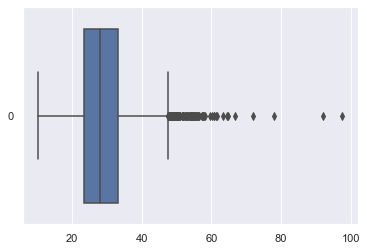

In [164]:
sb.boxplot(data = strokedata['bmi'], orient = "h")

In [165]:
strokedata.bmi.describe()

count    4908.00000
mean       28.89456
std         7.85432
min        10.30000
25%        23.50000
50%        28.10000
75%        33.10000
max        97.60000
Name: bmi, dtype: float64

In [166]:
#Fill up the null values with median
strokedata['bmi'] = strokedata['bmi'].fillna(strokedata['bmi'].median())

In [167]:
strokedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 608.0+ KB


Secondly, we are going to deal with the unknown values under the `smoking_status` column. Since they are classified as unknown, they are similar to null values thus we are going to reclassify them under other categories.

Value count for categories in smoking_status:
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

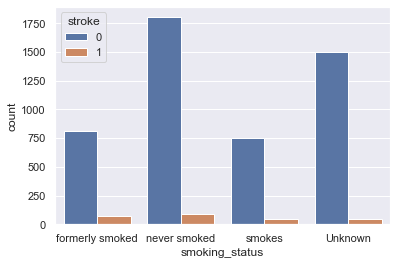

In [168]:
# Visualising the significance of the unknown category in the dataset
print('Value count for categories in smoking_status:')
val_count = strokedata['smoking_status'].value_counts()
print(val_count)

sb.countplot(data = strokedata, x = "smoking_status", hue = "stroke")

Under the "smoking_status" column, there is an `Unknown` category. We have to change it since it will lead to ambiguity for the machine learning, where it will wrongly conclude that people with unknown smoking status are less likely to suffer from a stroke. 

Following these steps, we intend to alter the data to remove the unknown category.
- Calculate the probability of having a stroke
- Convert the `Unknown` category to another based on the probability of getting a stroke

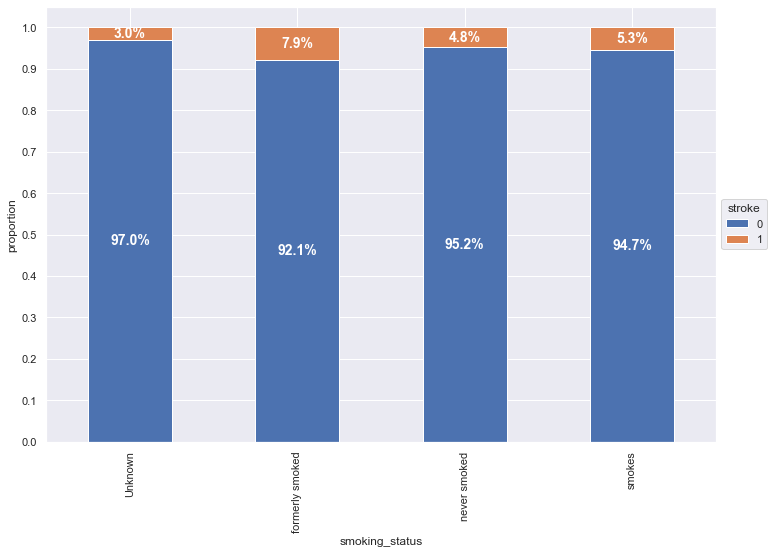

In [169]:
def stacked_bar_plot(data, x, y):
    fig, ax = plt.subplots(figsize = (12,8))

    crosstab = pd.crosstab(index = data[x], columns = data[y], normalize = 'index')

    crosstab.plot(kind = 'bar', stacked = True, ax = ax)

    ax.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), title = y)
    ax.set_ylabel('proportion')
    ax.set_yticks(np.linspace(0,1,11))

    for n, x in enumerate(crosstab.index):
        for (proportion, y_loc) in zip(crosstab.loc[x], crosstab.loc[x].cumsum()):
            ax.text(x = n,
                    y = (y_loc - proportion) + (proportion / 2),
                    s = f'{np.round(proportion * 100, 1)}%',
                    color = 'white',
                    fontsize = 14,
                    weight = 'bold',
                    horizontalalignment = 'center',
                    verticalalignment = 'center')

plt.show()

stacked_bar_plot(strokedata, 'smoking_status', 'stroke')

From the stacked bar plot above, we can infer that:
- Someone who has never smoked is least likely to suffer from a stroke (4.8%)
- Someone who formerly smoked is the most likely to suffer from a stroke (7.9%)

Therefore, we will adjust the dataset for our ML by:
1. For those who suffered from a stroke, set the category to `formerly smoked`
2. For those who did not suffer from a stroke, set the category to `never smoked`

Value count for categories in smoking_status:
never smoked       3389
formerly smoked     931
smokes              789
Name: smoking_status, dtype: int64


[Text(0.5, 1.0, 'After adjustment')]

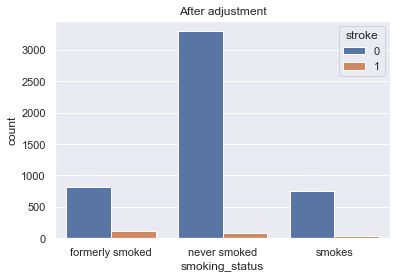

In [170]:
# '3' represents unknown category in the smoking_status column
step1 = (strokedata['smoking_status'] == 'Unknown') & (strokedata['stroke'] == 1)
strokedata.loc[step1, 'smoking_status'] = 'formerly smoked'

step2 = (strokedata['smoking_status'] == 'Unknown') & (strokedata['stroke'] == 0)
strokedata.loc[step2, 'smoking_status'] = 'never smoked'

# For checking 
print('Value count for categories in smoking_status:')
val_count = strokedata['smoking_status'].value_counts()
print(val_count)

sb.countplot(data = strokedata, x = "smoking_status", hue = "stroke").set(title = "After adjustment")

As seen in the countplot above, we have successfully removed the unknown category.

In [171]:
# Before adjusting the categorical data, we will extract the adjusted data into csv to be used for exploratory data analysis
strokedata.to_csv('adjusted_data.csv')

### Change object type to categorical type

In [172]:
# For those with only two distinct categorical type
strokedata['ever_married'] = strokedata['ever_married'].replace({'Yes' : 1 , 'No' : 0 })
strokedata['gender'] = strokedata['gender'].replace({'Male' : 1 , 'Female' : 0 })
strokedata['Residence_type'] = strokedata['Residence_type'].replace({'Urban' : 1 , 'Rural' : 0 })

In [173]:
# For the column 'work_type'
def work_type(column):
    if column == 'children':
        return 1
    elif column == 'Govt_job':
        return 2
    elif column == 'Never_worked':
        return 3
    elif column == 'Private':
        return 4
    else:
        return 5

In [174]:
strokedata.work_type = strokedata.work_type.apply(work_type)

In [175]:
# For the column 'smoking_status'
def smoking_status(column):
    if column == 'formerly smoked':
        return 0
    elif column == 'never smoked':
        return 1
    elif column == 'smokes':
        return 2
    else:
        return 3

In [176]:
strokedata.smoking_status = strokedata.smoking_status.apply(smoking_status)

In [177]:
strokedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   int64  
 6   Residence_type     5109 non-null   int64  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   int64  
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 608.0 KB


In [178]:
# Export cleaned dataset into csv file
strokedata.to_csv('cleaned_data.csv')